# Autoencoders

Autoencoders are a type of artificial neural network used for learning efficient codings of input data. They are unsupervised learning models that use the concept of data compression and decompression.

## How it Works

An autoencoder works by compressing the input into a latent-space representation, and then reconstructing the output from this representation. This kind of network is composed of two parts: an encoder, which is the part of the network that compresses the input, and a decoder, which is the part of the network that reconstructs the input from the compressed version.

During training, the idea is to tune the network parameters to minimize the difference between the input and the output, forcing the network to learn how to reconstruct the input data from the compressed representation.

## Use Cases

Autoencoders have a wide range of applications, including:

- **Dimensionality Reduction**: Autoencoders can be used to reduce the dimensionality of data, similar to PCA (Principal Component Analysis).

- **Anomaly Detection**: Autoencoders can be used to detect anomalies in data by reconstructing the input and then measuring the difference between the input and the reconstruction.

- **Image Denoising**: Autoencoders can be used to remove noise from images by training the network on noisy images and using the clean images as targets.

## Limitations

Despite their advantages, autoencoders also have some limitations:

- **Data Specificity**: Autoencoders are data-specific, which means they can only compress data similar to what they have been trained on.

- **Lossy Compression**: The compression process of an autoencoder is lossy, meaning that the decompressed outputs will be degraded compared to the original inputs.

- **Lack of Robustness**: Autoencoders are not very robust, meaning they can easily fail at compression and decompression if the input data has slightly changed.

- **Interpretability**: Like other deep learning models, autoencoders can be seen as "black boxes" and can be difficult to interpret. This can make it challenging to understand why a particular prediction was made.

# Автоэнкодеры

Автоэнкодеры - это тип искусственных нейронных сетей, используемых для изучения эффективных кодировок входных данных. Это модели обучения без учителя, которые используют концепцию сжатия и декомпрессии данных.

## Как это работает

Автоэнкодер работает, сжимая вход в представление скрытого пространства, а затем восстанавливая выход из этого представления. Этот тип сети состоит из двух частей: кодировщика, который является частью сети, сжимающей вход, и декодера, который является частью сети, восстанавливающей вход из сжатой версии.

Во время обучения идея состоит в том, чтобы настроить параметры сети для минимизации разницы между входом и выходом, заставляя сеть учиться, как восстановить входные данные из сжатого представления.

## Варианты использования

У автоэнкодеров есть широкий спектр применений, включая:

- **Снижение размерности**: Автоэнкодеры могут использоваться для снижения размерности данных, аналогично PCA (методу главных компонент).

- **Обнаружение аномалий**: Автоэнкодеры могут использоваться для обнаружения аномалий в данных, восстанавливая вход и затем измеряя разницу между входом и восстановлением.

- **Удаление шума из изображений**: Автоэнкодеры могут использоваться для удаления шума из изображений, обучая сеть на зашумленных изображениях и используя чистые изображения в качестве целей.

## Ограничения

Несмотря на их преимущества, у автоэнкодеров также есть некоторые ограничения:

- **Специфичность данных**: Автоэнкодеры специфичны для данных, что означает, что они могут сжимать только данные, похожие на те, на которых они были обучены.

- **Потерянное сжатие**: Процесс сжатия автоэнкодера является потерянным, что означает, что декомпрессированные выходы будут ухудшены по сравнению с оригинальными входами.

- **Отсутствие устойчивости**: Автоэнкодеры не очень устойчивы, что означает, что они могут легко потерпеть неудачу при сжатии и декомпрессии, если входные данные немного изменились.

- **Интерпретируемость**: Как и другие модели глубокого обучения, автоэнкодеры могут рассматриваться как "черные ящики" и могут быть сложными для интерпретации. Это может затруднить понимание причин, по которым был сделан определенный прогноз.

Epoch: 1, Train Loss: 0.056169499409784364, Val Loss: 0.04383435970544815
Epoch: 2, Train Loss: 0.040612958248219505, Val Loss: 0.03854514368375143
Epoch: 3, Train Loss: 0.037583760206459225, Val Loss: 0.03667348964512348
Epoch: 4, Train Loss: 0.03610811309473304, Val Loss: 0.035632960910598435
Epoch: 5, Train Loss: 0.03515849207575459, Val Loss: 0.03474218036234379
Epoch: 6, Train Loss: 0.034466143176867504, Val Loss: 0.03435966211060683
Epoch: 7, Train Loss: 0.0339291816121939, Val Loss: 0.034060768455266954
Epoch: 8, Train Loss: 0.0335004190514992, Val Loss: 0.03351604248583317
Epoch: 9, Train Loss: 0.03310668272138641, Val Loss: 0.033301808029413224
Epoch: 10, Train Loss: 0.03283655121128067, Val Loss: 0.033149807651837664
Epoch: 11, Train Loss: 0.03251798497477471, Val Loss: 0.032788731768727306
Epoch: 12, Train Loss: 0.032300480362666265, Val Loss: 0.03279718471566836
Epoch: 13, Train Loss: 0.03211116774031795, Val Loss: 0.032535608366131785
Epoch: 14, Train Loss: 0.0319491491538

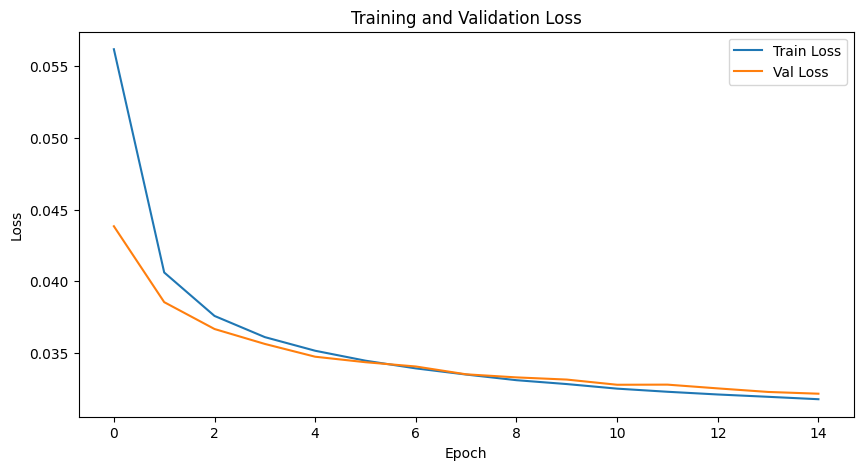

In [10]:
import torch
from torch import nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.utils.data import random_split, Subset


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

class MNISTDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.data = datasets.MNIST(
            root='./data',
            train=True,
            download=True,
            transform=transforms.ToTensor()
        )

    def __getitem__(self, index):
        img, _ = self.data[index]
        return img.view(-1)

    def __len__(self):
        return len(self.data)

    def split(self, train_frac=0.7, val_frac=0.2):
        train_len = int(train_frac * len(self))
        val_len = int(val_frac * len(self))
        test_len = len(self) - train_len - val_len
        return random_split(self, [train_len, val_len, test_len])

dataset = MNISTDataset()
train_dataset, val_dataset, test_dataset = dataset.split()

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_losses = []  # to store the training loss at each epoch
val_losses = []  # to store the validation loss at each epoch

for epoch in range(15):
    train_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_dataloader)
    train_losses.append(train_loss)

    val_loss = 0
    for batch in val_dataloader:
        outputs = model(batch)
        loss = criterion(outputs, batch)
        val_loss += loss.item()
    val_loss /= len(val_dataloader)
    val_losses.append(val_loss)

    print(f'Epoch: {epoch+1}, Train Loss: {train_loss}, Val Loss: {val_loss}')

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

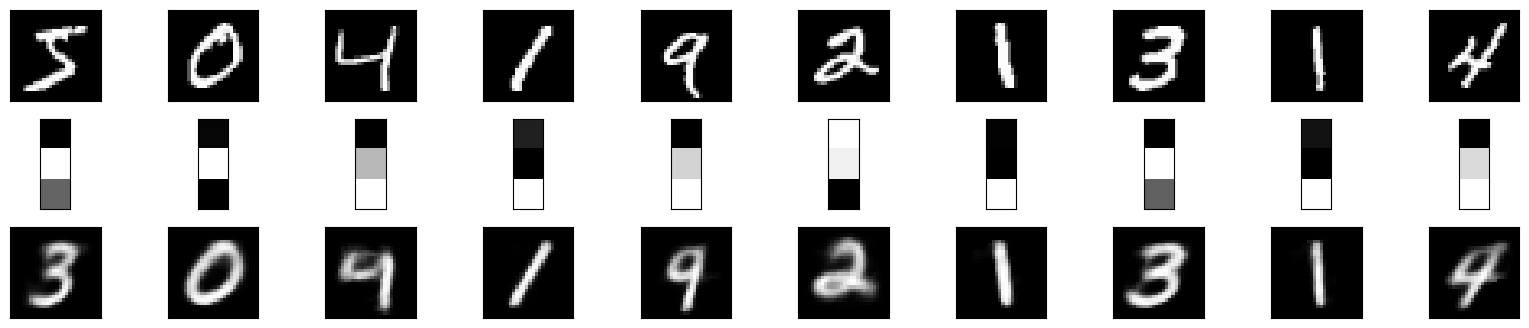

In [12]:
# Visualize the original images, encoded representations, and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(dataset[i].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded representation
    ax = plt.subplot(3, n, i + 1 + n)
    encoded_img = model.encoder(dataset[i]).detach().numpy()
    plt.imshow(encoded_img.reshape(-1, 1))  # reshape to 2D array for visualization
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(model(dataset[i]).detach().numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()